# Relationship Between Reddit 'Bitcoin Markets' daily threads number of

# comments and Bitcoin Price


In This work I will try to see if there is a relationship between bitcoin price and the number of comments on the daily threads of the popular trading subreddit 'Bitcoin Markets'.
The popular subreddit is known to be a hub of bitcoin traders and enthusiasts. The motivation for my work is to find if this thread is more popular during times of high, extreme or low prices.

In order to explore the relatioship I will scrape the number of comments data from the reddit's python API, download bitcoin prices chart from Yahoo finance, plot the two on the same graph, run a pearson correlation test, scatter plot the data, and run suitable regression. 

In [1]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
import numpy as np

##  scraping the number of comments from reddit 

In [2]:
#connecting to reddit API
reddit = praw.Reddit(client_id=, \
                     client_secret=, \
                     user_agent='Btc_talk_sc', \
                     username=, \
                     password=)


Version 7.2.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [3]:
#creating posts data frame with the number of comments 
posts = []
bm_subreddit = reddit.subreddit('BitcoinMarkets') #looking bm subreddit
for post in bm_subreddit.search("Daily Discussion"): #a loop to take the number if comments and date from each post (reddit's API limots the max number of posts available)
    posts.append([ post.num_comments, post.created])
posts = pd.DataFrame(posts,columns=[ 'comments', 'created']) #creating a data frame from the string posts
print(posts)

    comments       created
0       1330  1.634702e+09
1        595  1.635739e+09
2        803  1.635394e+09
3       1547  1.634270e+09
4       1160  1.634616e+09
..       ...           ...
95       706  1.627445e+09
96       564  1.627531e+09
97       700  1.627358e+09
98       746  1.627186e+09
99      1046  1.626667e+09

[100 rows x 2 columns]


In [4]:
#a function turning dates to timestamp
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = posts["created"].apply(get_date)
posts = posts.assign(timestamp = _timestamp)

In [5]:
display(posts)

,comments,created,timestamp
0,1330,1.634702e+09,2021-10-20 07:00:14
1,595,1.635739e+09,2021-11-01 06:00:16
2,803,1.635394e+09,2021-10-28 07:00:14
3,1547,1.634270e+09,2021-10-15 07:00:13
4,1160,1.634616e+09,2021-10-19 07:00:19
...,...,...,...
95,706,1.627445e+09,2021-07-28 07:00:16
96,564,1.627531e+09,2021-07-29 07:00:14
97,700,1.627358e+09,2021-07-27 07:00:17
98,746,1.627186e+09,2021-07-25 07:00:14


## Bitcoin Price Data and processing of the two data sets

In [6]:
#reading btc price table
btc_price = pd.read_csv() 

In [7]:
display(btc_price)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-26,13031.201172,13225.297852,12822.382813,13075.248047,13075.248047,29461458313
1,2020-10-27,13075.242188,13759.668945,13060.837891,13654.218750,13654.218750,33749878156
2,2020-10-28,13654.214844,13837.695313,12932.250977,13271.285156,13271.285156,35867318895
3,2020-10-29,13271.298828,13612.047852,12980.059570,13437.882813,13437.882813,56499499598
4,2020-10-30,13437.874023,13651.516602,13136.198242,13546.522461,13546.522461,30581485201
...,...,...,...,...,...,...,...
361,2021-10-22,62237.890625,63715.023438,60122.796875,60692.265625,60692.265625,38434082775
362,2021-10-23,60694.628906,61743.878906,59826.523438,61393.617188,61393.617188,26882546034
363,2021-10-24,61368.343750,61505.804688,59643.343750,60930.835938,60930.835938,27316183882
364,2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,31064911614


In [8]:
#changing dates to timestamp in reddit comments
posts['Date'] = posts['timestamp'].dt.date
display(posts)

,comments,created,timestamp,Date
0,1330,1.634702e+09,2021-10-20 07:00:14,2021-10-20
1,595,1.635739e+09,2021-11-01 06:00:16,2021-11-01
2,803,1.635394e+09,2021-10-28 07:00:14,2021-10-28
3,1547,1.634270e+09,2021-10-15 07:00:13,2021-10-15
4,1160,1.634616e+09,2021-10-19 07:00:19,2021-10-19
...,...,...,...,...
95,706,1.627445e+09,2021-07-28 07:00:16,2021-07-28
96,564,1.627531e+09,2021-07-29 07:00:14,2021-07-29
97,700,1.627358e+09,2021-07-27 07:00:17,2021-07-27
98,746,1.627186e+09,2021-07-25 07:00:14,2021-07-25


In [9]:
#sorting values
btc_price.sort_values(by=['Date'], inplace=True, ascending=False)
posts.sort_values(by=['Date'], inplace=True, ascending=False)


In [10]:
display(btc_price, posts)

,Date,Open,High,Low,Close,Adj Close,Volume
365,2021-10-26,62992.613281,63207.796875,61938.187500,62119.789063,62119.789063,32651266048
364,2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,31064911614
363,2021-10-24,61368.343750,61505.804688,59643.343750,60930.835938,60930.835938,27316183882
362,2021-10-23,60694.628906,61743.878906,59826.523438,61393.617188,61393.617188,26882546034
361,2021-10-22,62237.890625,63715.023438,60122.796875,60692.265625,60692.265625,38434082775
...,...,...,...,...,...,...,...
4,2020-10-30,13437.874023,13651.516602,13136.198242,13546.522461,13546.522461,30581485201
3,2020-10-29,13271.298828,13612.047852,12980.059570,13437.882813,13437.882813,56499499598
2,2020-10-28,13654.214844,13837.695313,12932.250977,13271.285156,13271.285156,35867318895
1,2020-10-27,13075.242188,13759.668945,13060.837891,13654.218750,13654.218750,33749878156


,comments,created,timestamp,Date
23,168,1.635826e+09,2021-11-02 06:00:11,2021-11-02
1,595,1.635739e+09,2021-11-01 06:00:16,2021-11-01
9,444,1.635653e+09,2021-10-31 06:00:20,2021-10-31
14,292,1.635566e+09,2021-10-30 07:00:10,2021-10-30
7,530,1.635480e+09,2021-10-29 07:00:14,2021-10-29
...,...,...,...,...
82,1000,1.627272e+09,2021-07-26 07:00:20,2021-07-26
98,746,1.627186e+09,2021-07-25 07:00:14,2021-07-25
88,1188,1.626840e+09,2021-07-21 07:00:14,2021-07-21
94,1048,1.626754e+09,2021-07-20 07:00:12,2021-07-20


In [11]:
#creating organized comments and dates table
comm = pd.pivot_table(posts, index='Date', values='comments').reset_index()
display(comm)

,Date,comments
0,2021-07-19,1046
1,2021-07-20,1048
2,2021-07-21,1188
3,2021-07-25,746
4,2021-07-26,1000
...,...,...
95,2021-10-29,530
96,2021-10-30,292
97,2021-10-31,444
98,2021-11-01,595


In [12]:
# creating an organized price and dates table
prc = pd.pivot_table(btc_price, index='Date', values='Close').reset_index()
display(prc)

,Date,Close
0,2020-10-26,13075.248047
1,2020-10-27,13654.218750
2,2020-10-28,13271.285156
3,2020-10-29,13437.882813
4,2020-10-30,13546.522461
...,...,...
361,2021-10-22,60692.265625
362,2021-10-23,61393.617188
363,2021-10-24,60930.835938
364,2021-10-25,63039.824219


In [13]:
#changing the dates to same format
prc['Date'] =  pd.to_datetime(prc['Date'], format='%Y-%m-%d')
comm['Date'] =  pd.to_datetime(comm['Date'], format='%Y-%m-%d')

In [14]:
#merging the tables of price and comments based on dates and deleting na's (the values iin the price table going further back then in the comments table)
price_comms = pd.merge_asof(prc, comm, on='Date')
#dropping na's
price_comms = price_comms.dropna() 
display(price_comms)

,Date,Close,comments
266,2021-07-19,30817.832031,1046.0
267,2021-07-20,29807.347656,1048.0
268,2021-07-21,32110.693359,1188.0
269,2021-07-22,32313.105469,1188.0
270,2021-07-23,33581.550781,1188.0
...,...,...,...
361,2021-10-22,60692.265625,657.0
362,2021-10-23,61393.617188,276.0
363,2021-10-24,60930.835938,478.0
364,2021-10-25,63039.824219,555.0


In [15]:
display(price_comms.info(), price_comms.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 266 to 365
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Close     100 non-null    float64       
 2   comments  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.1 KB


None

,Close,comments
count,100.000000,100.000000
mean,47565.433613,631.220000
std,7761.504473,263.457837
min,29807.347656,209.000000
25%,42842.788086,429.750000
50%,47073.738282,576.500000
75%,49964.812500,715.500000
max,65992.835938,1547.000000


## A line plot of the two variables

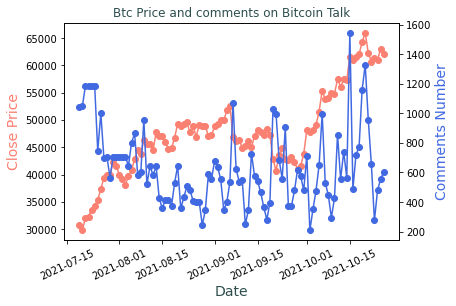

In [16]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(price_comms.Date, price_comms.Close, color="salmon", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14, color='darkslategrey')
# set y-axis label
ax.set_ylabel("Close Price",color="salmon",fontsize=14)
# twin object for two different y-axis on the sample plot
plt.xticks(rotation=25)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(price_comms.Date, price_comms["comments"],color="royalblue",marker="o")
ax2.set_ylabel("Comments Number",color="royalblue",fontsize=14)
# set title to the graph
plt.title('Btc Price and comments on Bitcoin Talk', color='darkslategrey')
plt.show()


In [17]:
display(price_comms.info(), price_comms.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 266 to 365
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Close     100 non-null    float64       
 2   comments  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.1 KB


None

,Close,comments
count,100.000000,100.000000
mean,47565.433613,631.220000
std,7761.504473,263.457837
min,29807.347656,209.000000
25%,42842.788086,429.750000
50%,47073.738282,576.500000
75%,49964.812500,715.500000
max,65992.835938,1547.000000


## Pearson's correlation test and scatter plot

In [18]:
#pearson test
scipy.pearsonr(price_comms['Close'], price_comms['comments'])

(-0.14460793760113086, 0.15115735037224942)

Text(0.5, 1.0, 'Bitcoin Price and Comments on Bitcoin Talk Scatter plot')

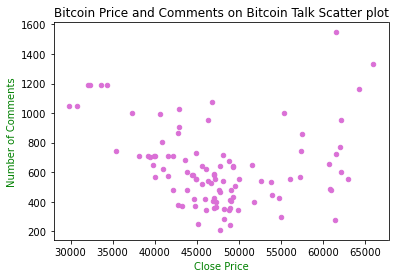

In [19]:
#scatter plot
bx1 = price_comms.plot.scatter(x='Close', y='comments', color='orchid')
#labels names
bx1.set_xlabel('Close Price', color='g')
bx1.set_ylabel('Number of Comments', color='g')
#plot title
plt.title('Bitcoin Price and Comments on Bitcoin Talk Scatter plot')



## Quadratic Polynomal Regression

In [20]:
# creating the model using numpy and printing coefficients
model = np.poly1d(np.polyfit(price_comms['Close'], price_comms['comments'], 2))
print(model)

           2
2.038e-06 x - 0.2032 x + 5563


In [21]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

In [22]:
#using the function to find R square
polyfit(price_comms['Close'], price_comms['comments'], 2)

{'r_squared': 0.4392342978895557}

## Conclusion
I did an analysis of the Bitcoin price and the activity in Bitcoin Markets thread in the past 100 days.
I plotted:

The price and the number of comments in the daily over time

The price VS the number of comments in the daily
I did a Pearson's correlation test and didn't find a significant correlation (-0.14, a small negative but not significant correlation).
Based on the scatterplot I thought that it would be a good idea to do a polynomial regression Analysis and found a R^2 of 0.43.
some other stats:
Mean Btc price during this period: 47,656.
Mean number of comments during this period: 631.22 (median: 576.5)
Max number of comments: 1547

My conclusion is that generally this thread is not correlated to BTC price but the days with the highest comments count are indeed during the extreme BTC prices (Both high and Low).